#  Visualizing Data with EPA's Air Quality System (AQS) API

---

# AQS Mapping

## Overview
In this notebook, we will explore the process of visualizing air pollution data using the EPA's Air Quality System (AQS) API. Our focus will be on plotting maps for gas concentrations and wind velocities.

In this notebook, we will cover:
1. Accessing data and plotting gas concentrations over the map
1. Visualization through scatterplots (Extra)
1. Creating a dataframe for wind velocities
1. Potting wind velocities over the map


## Prerequisites


| Concepts | Importance | Notes |
| --- | --- | --- |
|Intro to Folium| Necessary |Should know how to generate maps. |
|Intro to Pandas| Necessary | Familiarity with using dataframes. |
| Basics of Matplotlib| Necessary|Matplotlib for creating plots. |


- **Time to learn**: 50 minutes
- **System requirements**: Email address for AQS API access

---

## Imports


In [1]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime
import numpy as np
import pyaqsapi as aqs


##  Accessing data and plotting gas concentrations over the map
The data can be accessed from  EPA's Air Quality System in a similar way as done in the introductory notebook AQS Data Foundations.


In [2]:
# Enter your username and key
username = '' 
key = ''
aqs.aqs_credentials(username=username, key=key)
aqs.aqs_states()

code     value_represented
0    01               Alabama
1    02                Alaska
2    04               Arizona
3    05              Arkansas
4    06            California
5    08              Colorado
6    09           Connecticut
7    10              Delaware
8    11  District Of Columbia
9    12               Florida
10   13               Georgia
11   15                Hawaii
12   16                 Idaho
13   17              Illinois
14   18               Indiana
15   19                  Iowa
16   20                Kansas
17   21              Kentucky
18   22             Louisiana
19   23                 Maine
20   24              Maryland
21   25         Massachusetts
22   26              Michigan
23   27             Minnesota
24   28           Mississippi
25   29              Missouri
26   30               Montana
27   31              Nebraska
28   32                Nevada
29   33         New Hampshire
30   34            New Jersey
31   35            New Mexico
32   36              New York
33   37        North Carolina
34   38          North Dakota
35   39                  Ohio
36   40              Oklahoma
37   41                Oregon
38   42          Pennsylvania
39   44          Rhode Island
40   45        South Carolina
41   46          South Dakota
42   47             Tennessee
43   48                 Texas
44   49                  Utah
45   50               Vermont
46   51              Virginia
47   53            Washington
48   54         West Virginia
49   55             Wisconsin
50   56               Wyoming
51   66                  Guam
52   72           Puerto Rico
53   78        Virgin Islands
54   80     Country Of Mexico
55   CC                Canada

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Important</p>
    You can use the same username and key obtained from the notebook AQS Data Foundations given that they were saved earlier. For detailed steps on how to generate the key refer to the first notebook.
</div>

##### Parameter codes as variables ( For reference see notebook AQS Data Foundations )

We will work with New York state in our case.

In [3]:
states = aqs.aqs_states()
NY = 36 
CO = 42101
NO2 = 42602
O3 = 44201
PM10 = 81102
WS = 61103
WD  = 61104

Now, this code retrieves retrieves and displays ozone data for a specific date in New York stae using the Air Quality System (AQS) module, and sets the maximum displayed columns for a Pandas DataFrame. Additionally if no data is available it prints a message saying no data available.

In [4]:
year = 2022
month = 12
day = 6

# Ozone data for the specified date
ozone = aqs.bystate.sampledata(parameter=O3, bdate=date(year=year, month=month, day=day),
                               edate=date(year=year, month=month, day=day), stateFIPS=NY)

pd.set_option('display.max_columns', None)

# Display the result or a message if no data is available
if ozone.empty:
    print("Sorry, no data available for this date.")
else:
    display(ozone)

state_code county_code site_number parameter_code  poc  latitude  \
0           36         055        1007          44201    1  43.14618   
1           36         055        1007          44201    1  43.14618   
2           36         055        1007          44201    1  43.14618   
3           36         055        1007          44201    1  43.14618   
4           36         055        1007          44201    1  43.14618   
..         ...         ...         ...            ...  ...       ...   
595         36         109        9991          44201    1  42.40060   
596         36         109        9991          44201    1  42.40060   
597         36         109        9991          44201    1  42.40060   
598         36         109        9991          44201    1  42.40060   
599         36         109        9991          44201    1  42.40060   

     longitude  datum parameter  date_local time_local    date_gmt time_gmt  \
0    -77.54817  WGS84     Ozone  2022-12-06      00:00  2022-12-06    05:00   
1    -77.54817  WGS84     Ozone  2022-12-06      01:00  2022-12-06    06:00   
2    -77.54817  WGS84     Ozone  2022-12-06      02:00  2022-12-06    07:00   
3    -77.54817  WGS84     Ozone  2022-12-06      03:00  2022-12-06    08:00   
4    -77.54817  WGS84     Ozone  2022-12-06      04:00  2022-12-06    09:00   
..         ...    ...       ...         ...        ...         ...      ...   
595  -76.65380  WGS84     Ozone  2022-12-06      21:00  2022-12-07    02:00   
596  -76.65380  WGS84     Ozone  2022-12-06      22:00  2022-12-07    03:00   
597  -76.65380  WGS84     Ozone  2022-12-06      23:00  2022-12-07    04:00   
598  -76.65380  WGS84     Ozone  2022-12-06      02:00  2022-12-06    07:00   
599  -76.65380  WGS84     Ozone  2022-12-06      09:00  2022-12-06    14:00   

     sample_measurement   units_of_measure units_of_measure_code  \
0                 0.024  Parts per million                   007   
1                 0.021  Parts per million                   007   
2                 0.022  Parts per million                   007   
3                 0.022  Parts per million                   007   
4                 0.023  Parts per million                   007   
..                  ...                ...                   ...   
595               0.026  Parts per million                   007   
596               0.025  Parts per million                   007   
597               0.025  Parts per million                   007   
598                 NaN  Parts per million                   007   
599                 NaN  Parts per million                   007   

    sample_duration sample_duration_code sample_frequency  detection_limit  \
0            1 HOUR                    1           HOURLY            0.005   
1            1 HOUR                    1           HOURLY            0.005   
2            1 HOUR                    1           HOURLY            0.005   
3            1 HOUR                    1           HOURLY            0.005   
4            1 HOUR                    1           HOURLY            0.005   
..              ...                  ...              ...              ...   
595          1 HOUR                    1           HOURLY            0.005   
596          1 HOUR                    1           HOURLY            0.005   
597          1 HOUR                    1           HOURLY            0.005   
598          1 HOUR                    1           HOURLY            0.005   
599          1 HOUR                    1           HOURLY            0.005   

    uncertainty                             qualifier method_type  \
0          None                                  None         FEM   
1          None                                  None         FEM   
2          None                                  None         FEM   
3          None                                  None         FEM   
4          None                                  None         FEM   
..          ...       

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    The database ozone may contain NAN values!
</div>

#### Checking the relevant columns for NAN values in ozone database.

In [5]:
# Checking for NaN values in specific columns
columns_to_check = ['latitude', 'longitude', 'sample_measurement']
has_nan_values = ozone[columns_to_check].isna().any().any()

if has_nan_values:
    print(f"There are NaN values in the specified columns {columns_to_check}.")
else:
    print(f"There are no NaN values in the specified columns {columns_to_check}.")


There are NaN values in the specified columns ['latitude', 'longitude', 'sample_measurement'].


<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Ops!</p>
    We have NAN values. We need to deal with them before we plot our ozone concentrations over the map.
</div>

In [6]:
from folium.plugins import MarkerCluster

latitude_column = 'latitude'
longitude_column = 'longitude'

# Dropping  NaN values from the DataFrame
ozone = ozone.dropna(subset=[latitude_column, longitude_column, 'sample_measurement'])
ozone

state_code county_code site_number parameter_code  poc  latitude  \
0           36         055        1007          44201    1  43.14618   
1           36         055        1007          44201    1  43.14618   
2           36         055        1007          44201    1  43.14618   
3           36         055        1007          44201    1  43.14618   
4           36         055        1007          44201    1  43.14618   
..         ...         ...         ...            ...  ...       ...   
593         36         109        9991          44201    1  42.40060   
594         36         109        9991          44201    1  42.40060   
595         36         109        9991          44201    1  42.40060   
596         36         109        9991          44201    1  42.40060   
597         36         109        9991          44201    1  42.40060   

     longitude  datum parameter  date_local time_local    date_gmt time_gmt  \
0    -77.54817  WGS84     Ozone  2022-12-06      00:00  2022-12-06    05:00   
1    -77.54817  WGS84     Ozone  2022-12-06      01:00  2022-12-06    06:00   
2    -77.54817  WGS84     Ozone  2022-12-06      02:00  2022-12-06    07:00   
3    -77.54817  WGS84     Ozone  2022-12-06      03:00  2022-12-06    08:00   
4    -77.54817  WGS84     Ozone  2022-12-06      04:00  2022-12-06    09:00   
..         ...    ...       ...         ...        ...         ...      ...   
593  -76.65380  WGS84     Ozone  2022-12-06      19:00  2022-12-07    00:00   
594  -76.65380  WGS84     Ozone  2022-12-06      20:00  2022-12-07    01:00   
595  -76.65380  WGS84     Ozone  2022-12-06      21:00  2022-12-07    02:00   
596  -76.65380  WGS84     Ozone  2022-12-06      22:00  2022-12-07    03:00   
597  -76.65380  WGS84     Ozone  2022-12-06      23:00  2022-12-07    04:00   

     sample_measurement   units_of_measure units_of_measure_code  \
0                 0.024  Parts per million                   007   
1                 0.021  Parts per million                   007   
2                 0.022  Parts per million                   007   
3                 0.022  Parts per million                   007   
4                 0.023  Parts per million                   007   
..                  ...                ...                   ...   
593               0.027  Parts per million                   007   
594               0.026  Parts per million                   007   
595               0.026  Parts per million                   007   
596               0.025  Parts per million                   007   
597               0.025  Parts per million                   007   

    sample_duration sample_duration_code sample_frequency  detection_limit  \
0            1 HOUR                    1           HOURLY            0.005   
1            1 HOUR                    1           HOURLY            0.005   
2            1 HOUR                    1           HOURLY            0.005   
3            1 HOUR                    1           HOURLY            0.005   
4            1 HOUR                    1           HOURLY            0.005   
..              ...                  ...              ...              ...   
593          1 HOUR                    1           HOURLY            0.005   
594          1 HOUR                    1           HOURLY            0.005   
595          1 HOUR                    1           HOURLY            0.005   
596          1 HOUR                    1           HOURLY            0.005   
597          1 HOUR                    1           HOURLY            0.005   

    uncertainty qualifier method_type                       method  \
0          None      None         FEM  INSTRUMENTAL - ULTRA VIOLET   
1          None      None         FEM  INSTRUMENTAL - ULTRA VIOLET   
2          None      None         FEM  INSTRUMENTAL - ULTRA VIOLET   
3          None      None         FEM  INSTRUMENTAL - ULTRA VIOLET   
4          None      None         FEM  INSTRUMENTAL - ULTRA VIOLET   
..          ... 

We are down to 537 rows which means it worked!

In [7]:
# A base map centered at the first data point
map_center = [ozone[latitude_column].iloc[0], ozone[longitude_column].iloc[0]]
mymap = folium.Map(location=map_center, zoom_start=10)

# A MarkerCluster to group markers for better visualization
marker_cluster = MarkerCluster().add_to(mymap)

# Markers for each data point
for index, row in ozone.iterrows():
    folium.Marker(
        location=[row[latitude_column], row[longitude_column]],
        popup=f"Ozone Concentration: {row['sample_measurement']} {row['units_of_measure']}",
        icon=None  # You can customize the icon if needed
    ).add_to(marker_cluster)

# Displaying the map
mymap

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
    We have the ozone concentration data plotted over the NY state !
</div>

## Visualization through scatterplots 

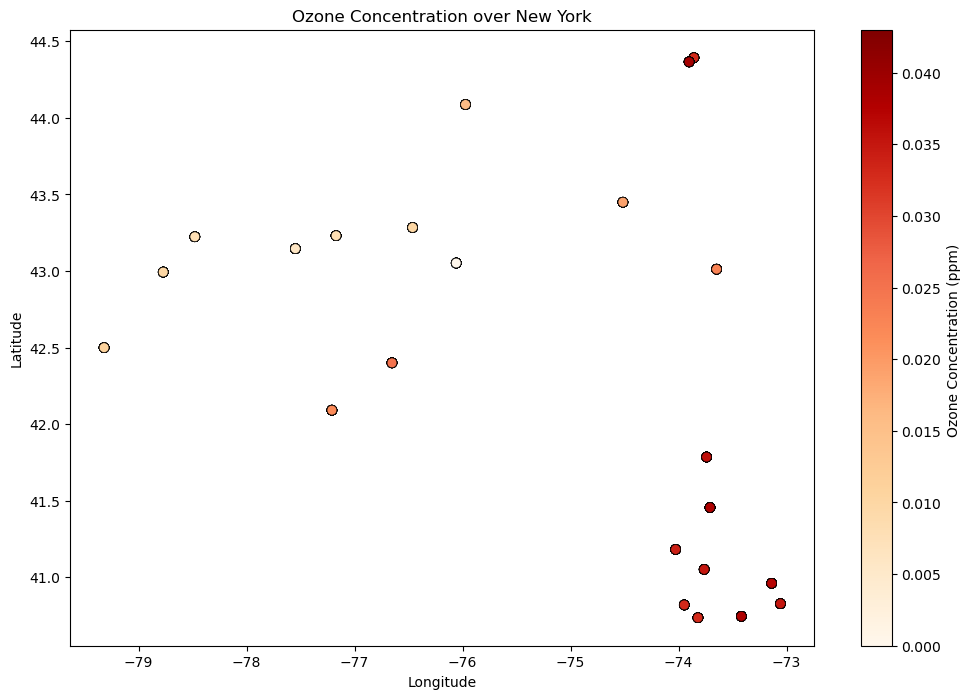

In [8]:
# Getting the columns from the ozone dataframe
latitude_column = 'latitude'
longitude_column = 'longitude'
ozone_column = 'sample_measurement'

# A scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(ozone[longitude_column], ozone[latitude_column], c=ozone[ozone_column], cmap='OrRd', s=50, edgecolors='k', linewidths=0.5)

# Colorbar for ozone concentration
cbar = plt.colorbar()
cbar.set_label('Ozone Concentration (ppm) ')

# Plot title and labels
plt.title('Ozone Concentration over New York')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


We can use the scatterplot to pinpoint areas with higher ozone concentrations taken from sample measurements. 

#### We can get similar visualizations using other parameters like Carbon Monoxide, Nitrogen Dioxide and PM 10. 

Now lets try getting the Carbon Monoxide concentrations over NY for the same date.

In [9]:
year = 2022
month = 12
day = 6

# co data for the specified date
co = aqs.bystate.sampledata(parameter=CO, bdate=date(year=year, month=month, day=day),
                               edate=date(year=year, month=month, day=day), stateFIPS=NY)

pd.set_option('display.max_columns', None)

# Display the result or a message if no data is available
if co.empty:
    print("Sorry, no data available for this date.")
else:
    display(co)

state_code county_code site_number parameter_code  poc   latitude  \
0           36         055        1007          42101    1  43.146180   
1           36         055        1007          42101    1  43.146180   
2           36         055        1007          42101    1  43.146180   
3           36         055        1007          42101    1  43.146180   
4           36         055        1007          42101    1  43.146180   
..         ...         ...         ...            ...  ...        ...   
235         36         029        0005          42101    1  42.876907   
236         36         029        0005          42101    1  42.876907   
237         36         029        0005          42101    1  42.876907   
238         36         029        0005          42101    1  42.876907   
239         36         029        0005          42101    1  42.876907   

     longitude  datum        parameter  date_local time_local    date_gmt  \
0   -77.548170  WGS84  Carbon monoxide  2022-12-06      00:00  2022-12-06   
1   -77.548170  WGS84  Carbon monoxide  2022-12-06      01:00  2022-12-06   
2   -77.548170  WGS84  Carbon monoxide  2022-12-06      02:00  2022-12-06   
3   -77.548170  WGS84  Carbon monoxide  2022-12-06      03:00  2022-12-06   
4   -77.548170  WGS84  Carbon monoxide  2022-12-06      04:00  2022-12-06   
..         ...    ...              ...         ...        ...         ...   
235 -78.809526  WGS84  Carbon monoxide  2022-12-06      19:00  2022-12-07   
236 -78.809526  WGS84  Carbon monoxide  2022-12-06      20:00  2022-12-07   
237 -78.809526  WGS84  Carbon monoxide  2022-12-06      21:00  2022-12-07   
238 -78.809526  WGS84  Carbon monoxide  2022-12-06      22:00  2022-12-07   
239 -78.809526  WGS84  Carbon monoxide  2022-12-06      23:00  2022-12-07   

    time_gmt  sample_measurement   units_of_measure units_of_measure_code  \
0      05:00               0.165  Parts per million                   007   
1      06:00               0.180  Parts per million                   007   
2      07:00               0.178  Parts per million                   007   
3      08:00               0.164  Parts per million                   007   
4      09:00               0.161  Parts per million                   007   
..       ...                 ...                ...                   ...   
235    00:00               0.400  Parts per million                   007   
236    01:00               0.400  Parts per million                   007   
237    02:00               0.400  Parts per million                   007   
238    03:00               0.400  Parts per million                   007   
239    04:00               0.400  Parts per million                   007   

    sample_duration sample_duration_code sample_frequency  detection_limit  \
0            1 HOUR                    1           HOURLY             0.02   
1            1 HOUR                    1           HOURLY             0.02   
2            1 HOUR                    1           HOURLY             0.02   
3            1 HOUR                    1           HOURLY             0.02   
4            1 HOUR                    1           HOURLY             0.02   
..              ...                  ...              ...              ...   
235          1 HOUR                    1           HOURLY             0.50   
236          1 HOUR                    1           HOURLY             0.50   
237          1 HOUR                    1           HOURLY             0.50   
238          1 HOUR                    1           HOURLY             0.50   
239          1 HOUR                    1           HOURLY             0.50   

    uncertainty qualifier method_type  \
0          None      None         FRM   
1          None      None         FRM   
2          None      None         FRM   
3          None      None         FRM   
4          None      None         FRM   
..          ...       ...         ...   
235        None      None         FRM   
236        N

We see that for CO dataframe we only have 240 rows as opposed to 600 rows for the ozone, so not a lot of sample measurements.

Again checking for NAN values.

In [10]:
# Checking for NaN values in specific columns
columns_to_check = ['latitude', 'longitude', 'sample_measurement']
has_nan_values = co[columns_to_check].isna().any().any()

if has_nan_values:
    print(f"There are NaN values in the specified columns {columns_to_check}.")
else:
    print(f"There are no NaN values in the specified columns {columns_to_check}.")


There are NaN values in the specified columns ['latitude', 'longitude', 'sample_measurement'].


In [11]:
latitude_column = 'latitude'
longitude_column = 'longitude'

# Dropping  NaN values from the DataFrame
co = co.dropna(subset=[latitude_column, longitude_column, 'sample_measurement'])
co

state_code county_code site_number parameter_code  poc   latitude  \
0           36         055        1007          42101    1  43.146180   
1           36         055        1007          42101    1  43.146180   
2           36         055        1007          42101    1  43.146180   
3           36         055        1007          42101    1  43.146180   
4           36         055        1007          42101    1  43.146180   
..         ...         ...         ...            ...  ...        ...   
235         36         029        0005          42101    1  42.876907   
236         36         029        0005          42101    1  42.876907   
237         36         029        0005          42101    1  42.876907   
238         36         029        0005          42101    1  42.876907   
239         36         029        0005          42101    1  42.876907   

     longitude  datum        parameter  date_local time_local    date_gmt  \
0   -77.548170  WGS84  Carbon monoxide  2022-12-06      00:00  2022-12-06   
1   -77.548170  WGS84  Carbon monoxide  2022-12-06      01:00  2022-12-06   
2   -77.548170  WGS84  Carbon monoxide  2022-12-06      02:00  2022-12-06   
3   -77.548170  WGS84  Carbon monoxide  2022-12-06      03:00  2022-12-06   
4   -77.548170  WGS84  Carbon monoxide  2022-12-06      04:00  2022-12-06   
..         ...    ...              ...         ...        ...         ...   
235 -78.809526  WGS84  Carbon monoxide  2022-12-06      19:00  2022-12-07   
236 -78.809526  WGS84  Carbon monoxide  2022-12-06      20:00  2022-12-07   
237 -78.809526  WGS84  Carbon monoxide  2022-12-06      21:00  2022-12-07   
238 -78.809526  WGS84  Carbon monoxide  2022-12-06      22:00  2022-12-07   
239 -78.809526  WGS84  Carbon monoxide  2022-12-06      23:00  2022-12-07   

    time_gmt  sample_measurement   units_of_measure units_of_measure_code  \
0      05:00               0.165  Parts per million                   007   
1      06:00               0.180  Parts per million                   007   
2      07:00               0.178  Parts per million                   007   
3      08:00               0.164  Parts per million                   007   
4      09:00               0.161  Parts per million                   007   
..       ...                 ...                ...                   ...   
235    00:00               0.400  Parts per million                   007   
236    01:00               0.400  Parts per million                   007   
237    02:00               0.400  Parts per million                   007   
238    03:00               0.400  Parts per million                   007   
239    04:00               0.400  Parts per million                   007   

    sample_duration sample_duration_code sample_frequency  detection_limit  \
0            1 HOUR                    1           HOURLY             0.02   
1            1 HOUR                    1           HOURLY             0.02   
2            1 HOUR                    1           HOURLY             0.02   
3            1 HOUR                    1           HOURLY             0.02   
4            1 HOUR                    1           HOURLY             0.02   
..              ...                  ...              ...              ...   
235          1 HOUR                    1           HOURLY             0.50   
236          1 HOUR                    1           HOURLY             0.50   
237          1 HOUR                    1           HOURLY             0.50   
238          1 HOUR                    1           HOURLY             0.50   
239          1 HOUR                    1           HOURLY             0.50   

    uncertainty qualifier method_type  \
0          None      None         FRM   
1          None      None         FRM   
2          None      None         FRM   
3          None      None         FRM   
4          None      None         FRM   
..          ...       ...         ...   
235        None      None         FRM   
236        N

Finally plotting CO concentrations over NY state

In [12]:
# Create a base map centered at the first data point
map_center = [co[latitude_column].iloc[0], co[longitude_column].iloc[0]]
mymap = folium.Map(location=map_center, zoom_start=10)

# Create a MarkerCluster to group markers for better visualization
marker_cluster = MarkerCluster().add_to(mymap)

# Add markers for each data point
for index, row in co.iterrows():
    folium.Marker(
        location=[row[latitude_column], row[longitude_column]],
        popup=f"Carbon Monoxide Concentration: {row['sample_measurement']} {row['units_of_measure']}",
        icon=None  # You can customize the icon if needed
    ).add_to(marker_cluster)

# Display the map inline
mymap

Now that  we are done plotting gas concentrations over the map lets try plotting wind velocities.

## Creating a dataframe for wind velocities

We follow a similar approach as done earlier by getting data on wind speed and wind direction from AQS . The only difference is that we will be changing our parameters to WS for wind speed and WD for wind direction.

In [13]:
year = 2022
month = 12
day = 6

# Retrieve wind speed data for the specified date
wind_speed = aqs.bystate.sampledata(parameter=WS, bdate=date(year=year, month=month, day=day),
                               edate=date(year=year, month=month, day=day), stateFIPS=NY)
pd.set_option('display.max_columns', None)

# Display the result or a message if no data is available
if wind_speed.empty:
    print("Sorry, no data available for this date.")
else:
    display(wind_speed)

Sorry, no data available for this date.


<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Ops!</p>
    Seems like we have no data available for this date. Lets try this for other dates.
</div>

In [14]:
year = 2020
month = 1
day = 1

# Retrieve wind speed data for the specified date
wind_speed = aqs.bystate.sampledata(parameter=WS, bdate=date(year=year, month=month, day=day),
                               edate=date(year=year, month=month, day=day), stateFIPS=NY)
pd.set_option('display.max_columns', None)

# Display the result or a message if no data is available
if wind_speed.empty:
    print("Sorry, no data available for this date.")
else:
    display(wind_speed)

state_code county_code site_number parameter_code  poc  latitude  \
0           36         013        0006          61103    1  42.49963   
1           36         013        0006          61103    1  42.49963   
2           36         013        0006          61103    1  42.49963   
3           36         013        0006          61103    1  42.49963   
4           36         013        0006          61103    1  42.49963   
..         ...         ...         ...            ...  ...       ...   
211         36         055        1007          61103    1  43.14618   
212         36         101        0003          61103    1  42.09142   
213         36         101        0003          61103    1  42.09142   
214         36         101        0003          61103    1  42.09142   
215         36         101        0003          61103    1  42.09142   

     longitude  datum               parameter  date_local time_local  \
0    -79.31881  WGS84  Wind Speed - Resultant  2020-01-01      00:00   
1    -79.31881  WGS84  Wind Speed - Resultant  2020-01-01      01:00   
2    -79.31881  WGS84  Wind Speed - Resultant  2020-01-01      02:00   
3    -79.31881  WGS84  Wind Speed - Resultant  2020-01-01      03:00   
4    -79.31881  WGS84  Wind Speed - Resultant  2020-01-01      04:00   
..         ...    ...                     ...         ...        ...   
211  -77.54817  WGS84  Wind Speed - Resultant  2020-01-01      23:00   
212  -77.20978  WGS84  Wind Speed - Resultant  2020-01-01      20:00   
213  -77.20978  WGS84  Wind Speed - Resultant  2020-01-01      21:00   
214  -77.20978  WGS84  Wind Speed - Resultant  2020-01-01      22:00   
215  -77.20978  WGS84  Wind Speed - Resultant  2020-01-01      23:00   

       date_gmt time_gmt  sample_measurement units_of_measure  \
0    2020-01-01    05:00                 NaN            Knots   
1    2020-01-01    06:00                 NaN            Knots   
2    2020-01-01    07:00                 NaN            Knots   
3    2020-01-01    08:00                 NaN            Knots   
4    2020-01-01    09:00                 NaN            Knots   
..          ...      ...                 ...              ...   
211  2020-01-02    04:00                 2.6            Knots   
212  2020-01-02    01:00                 0.9            Knots   
213  2020-01-02    02:00                 0.9            Knots   
214  2020-01-02    03:00                 0.9            Knots   
215  2020-01-02    04:00                 0.9            Knots   

    units_of_measure_code sample_duration sample_duration_code  \
0                     013          1 HOUR                    1   
1                     013          1 HOUR                    1   
2                     013          1 HOUR                    1   
3                     013          1 HOUR                    1   
4                     013          1 HOUR                    1   
..                    ...             ...                  ...   
211                   013          1 HOUR                    1   
212                   013          1 HOUR                    1   
213                   013          1 HOUR                    1   
214                   013          1 HOUR                    1   
215                   013          1 HOUR                    1   

    sample_frequency  detection_limit uncertainty  \
0             HOURLY              0.1        None   
1             HOURLY              0.1        None   
2             HOURLY              0.1        None   
3             HOURLY              0.1        None   
4             HOURLY              0.1        None   
..               ...              ...         ...   
211           HOURLY              0.1        None   
212           HOURLY              0.1        None   
213           HOURLY              0.1        None   
214           HOURLY              0.1        None   
215           HOURLY              0.1        None   

                             qualifier method_type  \
0    BA -

In [15]:
# Selecting relevant columns from the dataframe
latitude_column = 'latitude'
longitude_column = 'longitude'
date_column = 'date_local'
time_column = 'time_local'
speed_column = 'sample_measurement'
units_column = 'units_of_measure'
site_number_column = 'site_number'

# Dropping  NaN values 
wind_speed = wind_speed.dropna(subset=[latitude_column, longitude_column, date_column, time_column, speed_column, units_column, site_number_column])

# Keep only specific columns
wind_speed = wind_speed[[date_column, time_column, speed_column, units_column, site_number_column, latitude_column, longitude_column]]

# Convert wind speed from knots to meters per second
wind_speed[speed_column] = wind_speed[speed_column] * 0.514444

# Add 'units_of_measure' column
wind_speed[units_column] = 'Meter per second'

# Rename the 'sample_measurement' column to 'sample_speed'
wind_speed = wind_speed.rename(columns={speed_column: 'sample_speed'})

#Display
wind_speed


date_local time_local  sample_speed  units_of_measure site_number  \
48   2020-01-01      00:00      2.212109  Meter per second        1007   
49   2020-01-01      01:00      1.800554  Meter per second        1007   
50   2020-01-01      02:00      1.337554  Meter per second        1007   
51   2020-01-01      03:00      1.800554  Meter per second        1007   
52   2020-01-01      04:00      1.800554  Meter per second        1007   
..          ...        ...           ...               ...         ...   
211  2020-01-01      23:00      1.337554  Meter per second        1007   
212  2020-01-01      20:00      0.463000  Meter per second        0003   
213  2020-01-01      21:00      0.463000  Meter per second        0003   
214  2020-01-01      22:00      0.463000  Meter per second        0003   
215  2020-01-01      23:00      0.463000  Meter per second        0003   

     latitude  longitude  
48   43.14618  -77.54817  
49   43.14618  -77.54817  
50   43.14618  -77.54817  
51   43.14618  -77.54817  
52   43.14618  -77.54817  
..        ...        ...  
211  43.14618  -77.54817  
212  42.09142  -77.20978  
213  42.09142  -77.20978  
214  42.09142  -77.20978  
215  42.09142  -77.20978  

[96 rows x 7 columns]

This code preprocesses wind speed data by cleaning, selecting relevant columns, converting units, and renaming columns, resulting in a DataFrame (wind_speed) ready for analysis.

#### Now we repeat this process for our wind direction dataframe.

In [16]:
year = 2020
month = 1
day = 1

# Retrieve wind direction data for the specified date
wind_direction = aqs.bystate.sampledata(parameter=WD, bdate=date(year=year, month=month, day=day),
                               edate=date(year=year, month=month, day=day), stateFIPS=NY)
pd.set_option('display.max_columns', None)
# Display the result or a message if no data is available
if wind_direction.empty:
    print("Sorry, no data available for this date.")
else:
    display(wind_direction)

state_code county_code site_number parameter_code  poc   latitude  \
0           36         029        0005          61104    1  42.876907   
1           36         029        0005          61104    1  42.876907   
2           36         029        0005          61104    1  42.876907   
3           36         029        0005          61104    1  42.876907   
4           36         029        0005          61104    1  42.876907   
..         ...         ...         ...            ...  ...        ...   
187         36         055        1007          61104    1  43.146180   
188         36         055        1007          61104    1  43.146180   
189         36         055        1007          61104    1  43.146180   
190         36         055        1007          61104    1  43.146180   
191         36         055        1007          61104    1  43.146180   

     longitude  datum                   parameter  date_local time_local  \
0   -78.809526  WGS84  Wind Direction - Resultant  2020-01-01      00:00   
1   -78.809526  WGS84  Wind Direction - Resultant  2020-01-01      01:00   
2   -78.809526  WGS84  Wind Direction - Resultant  2020-01-01      02:00   
3   -78.809526  WGS84  Wind Direction - Resultant  2020-01-01      03:00   
4   -78.809526  WGS84  Wind Direction - Resultant  2020-01-01      04:00   
..         ...    ...                         ...         ...        ...   
187 -77.548170  WGS84  Wind Direction - Resultant  2020-01-01      19:00   
188 -77.548170  WGS84  Wind Direction - Resultant  2020-01-01      20:00   
189 -77.548170  WGS84  Wind Direction - Resultant  2020-01-01      21:00   
190 -77.548170  WGS84  Wind Direction - Resultant  2020-01-01      22:00   
191 -77.548170  WGS84  Wind Direction - Resultant  2020-01-01      23:00   

       date_gmt time_gmt  sample_measurement units_of_measure  \
0    2020-01-01    05:00                 NaN  Degrees Compass   
1    2020-01-01    06:00                 NaN  Degrees Compass   
2    2020-01-01    07:00                 NaN  Degrees Compass   
3    2020-01-01    08:00                 NaN  Degrees Compass   
4    2020-01-01    09:00                 NaN  Degrees Compass   
..          ...      ...                 ...              ...   
187  2020-01-02    00:00               194.0  Degrees Compass   
188  2020-01-02    01:00               163.0  Degrees Compass   
189  2020-01-02    02:00               162.0  Degrees Compass   
190  2020-01-02    03:00               164.0  Degrees Compass   
191  2020-01-02    04:00               163.0  Degrees Compass   

    units_of_measure_code sample_duration sample_duration_code  \
0                     014          1 HOUR                    1   
1                     014          1 HOUR                    1   
2                     014          1 HOUR                    1   
3                     014          1 HOUR                    1   
4                     014          1 HOUR                    1   
..                    ...             ...                  ...   
187                   014          1 HOUR                    1   
188                   014          1 HOUR                    1   
189                   014          1 HOUR                    1   
190                   014          1 HOUR                    1   
191                   014          1 HOUR                    1   

    sample_frequency  detection_limit uncertainty                  qualifier  \
0             HOURLY              0.1        None  AN - Machine Malfunction.   
1             HOURLY              0.1        None  AN - Machine Malfunction.   
2             HOURLY              0.1        None  AN - Machine Malfunction.   
3             HOURLY              0.1        None  AN - Machine Malfunction.   
4             HOURLY              0.1        None  AN - Machine Malfunction.   
..               ...              ...         ...                        ...   
187           HOURLY              0.1        None                       None   


In [17]:
# Relevant columns
latitude_column = 'latitude'
longitude_column = 'longitude'
date_column = 'date_local'
time_column = 'time_local'
direction_column = 'sample_measurement'
units_column = 'units_of_measure'
site_number_column = 'site_number'

# Drop NaN values
wind_direction = wind_direction.dropna(subset=[latitude_column, longitude_column, date_column, time_column, direction_column, units_column, site_number_column])

# Keep only specific columns
wind_direction = wind_direction[[date_column, time_column, direction_column, units_column, site_number_column, latitude_column, longitude_column]]

# Rename the 'sample_measurement' column to 'sample_speed'
wind_direction = wind_direction.rename(columns={direction_column: 'sample_direction'})

# Print or display the resulting DataFrame
wind_direction


date_local time_local  sample_direction units_of_measure site_number  \
24   2020-01-01      00:00             179.0  Degrees Compass        0003   
25   2020-01-01      01:00             178.0  Degrees Compass        0003   
26   2020-01-01      02:00             176.0  Degrees Compass        0003   
27   2020-01-01      03:00             183.0  Degrees Compass        0003   
28   2020-01-01      04:00             172.0  Degrees Compass        0003   
..          ...        ...               ...              ...         ...   
187  2020-01-01      19:00             194.0  Degrees Compass        1007   
188  2020-01-01      20:00             163.0  Degrees Compass        1007   
189  2020-01-01      21:00             162.0  Degrees Compass        1007   
190  2020-01-01      22:00             164.0  Degrees Compass        1007   
191  2020-01-01      23:00             163.0  Degrees Compass        1007   

     latitude  longitude  
24   42.09142  -77.20978  
25   42.09142  -77.20978  
26   42.09142  -77.20978  
27   42.09142  -77.20978  
28   42.09142  -77.20978  
..        ...        ...  
187  43.14618  -77.54817  
188  43.14618  -77.54817  
189  43.14618  -77.54817  
190  43.14618  -77.54817  
191  43.14618  -77.54817  

[96 rows x 7 columns]

#### Finally getting our wind_data 

In [18]:
wind_data = pd.merge(wind_speed, wind_direction, on=['latitude', 'longitude'])

Checking out the columns.

In [19]:
wind_data.columns

Index(['date_local_x', 'time_local_x', 'sample_speed', 'units_of_measure_x',
       'site_number_x', 'latitude', 'longitude', 'date_local_y',
       'time_local_y', 'sample_direction', 'units_of_measure_y',
       'site_number_y'],
      dtype='object')

## Potting wind velocities over the map

In [20]:
from folium.plugins import MarkerCluster

# Choosing relevant columns 
latitude_column = 'latitude'
longitude_column = 'longitude'
speed_column = 'sample_speed'
direction_column = 'sample_direction'

# A Folium map centered at the mean latitude and longitude
map_center = [wind_data[latitude_column].mean(), wind_data[longitude_column].mean()]
my_map = folium.Map(location=map_center, zoom_start=10)

# Adding wind velocity arrows to the map
marker_cluster = MarkerCluster().add_to(my_map)

# Iterating over rows and adding markers with wind velocity arrows
for index, row in wind_data.iterrows():
    latitude = row[latitude_column]
    longitude = row[longitude_column]
    speed = row[speed_column]
    direction = row[direction_column]

    # Creating a Folium marker showing wind speed and direction
    folium.Marker(location=[latitude, longitude],
                  popup=f"Speed: {speed} m/s\nDirection: {direction}°",
                  icon=folium.DivIcon(html=f"<div style='font-size: 12pt; color: red;'>"
                                          f"<span style='transform: rotate({direction}deg); "
                                          f"display: inline-block;'>→</span></div>")).add_to(marker_cluster)

# Display the map
my_map



<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
    We have successfully plotted maps marking  gas concentrations and wind velocities over the NYS.
</div>

## Summary
In this notebook, we've  
- plotted air pollution data over a chosen state
- explored visualization through a scatterplot
- created a wind velocity dataframe from the EPA's AQS
- plotted wind velocities over the map


#### What's next?
In the next notebook we will explore how to make interactive visualizations from the maps.


<b>You are encouraged to explore other parameters within the dataset, and to look at other ways to plot this data over the map!</b>

## Resources and references

The EPA's AQS has general information and documentation here: https://www.epa.gov/aqs

For more information regrading the use of Folium refer:https://realpython.com/python-folium-web-maps-from-data/

Details about the specific parameter codes can be found here: https://aqs.epa.gov/aqsweb/documents/codetables/parameters.html

To access real-time data for air pollution, the [AirNow API](https://docs.airnowapi.org/) can be utilized.

---
##### This notebook was made by Anadhi Sharma